In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import pyhector
import matplotlib.pyplot as plt

plt.style.use("ggplot")
plt.rcParams.update({'font.size': 22})

In [3]:
from pandas_datapackage_reader import read_datapackage

from util import root

Target unit: MtCH4

# RCP

In [4]:
RCP = "RCP"
ch4_rcp = pyhector.rcp26.CH4_emissions.loc[:2005]

# PRIMAP-hist

In [5]:
PRIMAPHIST = "PRIMAPHIST v1.2"

In [6]:
primaphist = pd.read_csv(root / "data/primap-hist/PRIMAP-hist_v1.2_14-Dec-2017.csv")
primaphist = primaphist.drop(["scenario", "unit"], axis=1)
primaphist = primaphist.set_index(["country", "category", "entity"])
primaphist = primaphist.sort_index()
primaphist.columns = primaphist.columns.astype(int)

In [7]:
# Does not include international bunkers.
ch4_primaphist = primaphist.loc["EARTH", "CAT0", "CH4"] / 10**3 # Gg -> Mt

# Figure

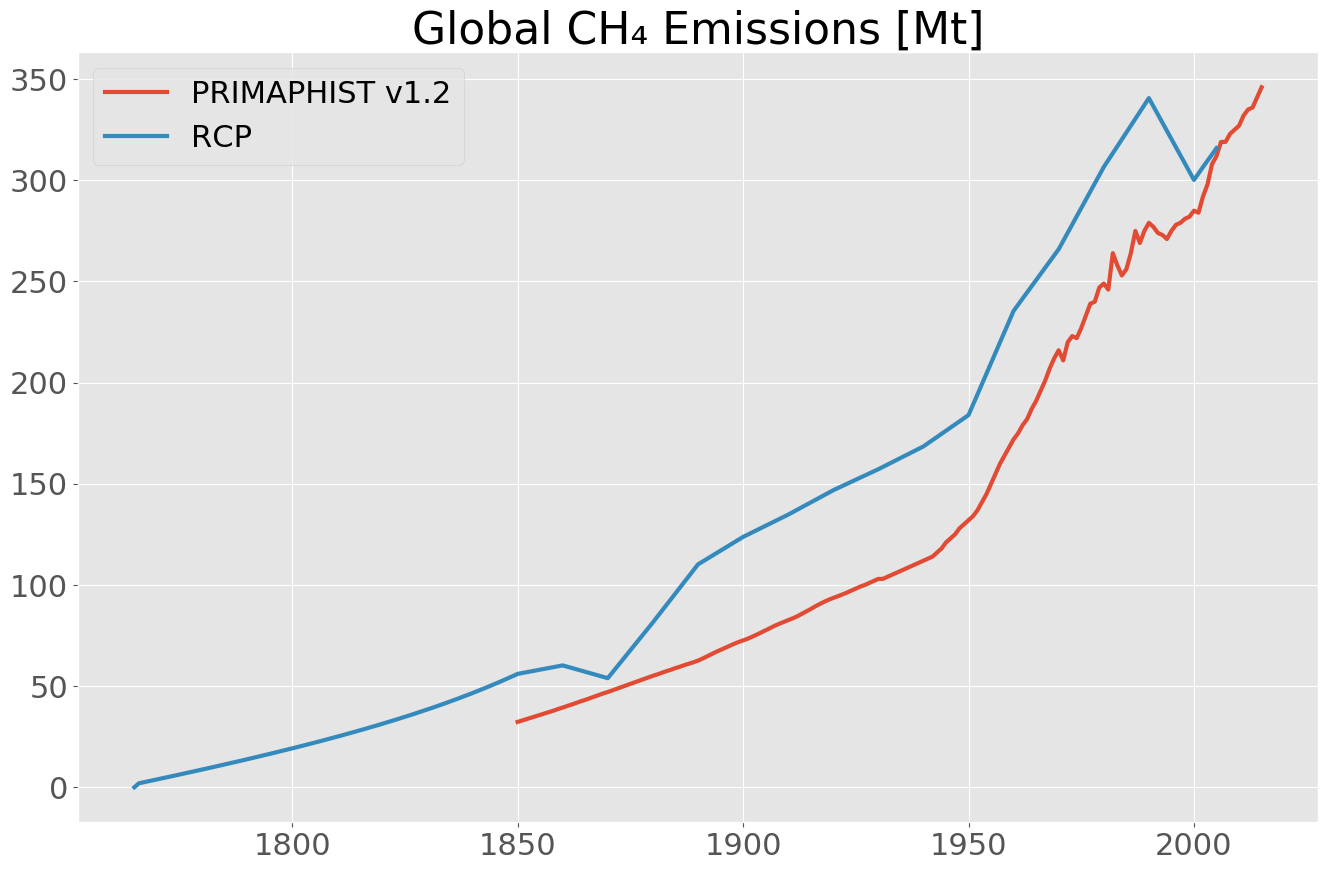

In [8]:
lw = 3
ch4_primaphist.plot(label=PRIMAPHIST, linewidth=lw)
ch4_rcp.plot(label=RCP, linewidth=lw)
plt.title("Global CH₄ Emissions [Mt]")
plt.legend()
plt.xlabel("")
plt.savefig(
    root / "content/images/global-ch4.png",
    bbox_inches="tight", 
    pad_inches=0
)